In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.decomposition import PCA

from tqdm import tqdm 

import child_poverty_iraq.utils.constants as c
import child_poverty_iraq.models.train_model as tm

# Load Data

In [2]:
merged = pd.read_csv('../data/processed/20230918_adm1_mosaiks_pov_merged.csv')
merged.shape

(1033, 4031)

In [3]:
target = 'deprived_mod'

In [4]:
# Clean target
data = tm.clean_target(merged, target)

# Split Train test
merged_train, merged_test = tm.split_train_test(data, target)
X_train, y_train = merged_train[c.mosaiks_features], merged_train[target]
X_test, y_test = merged_test[c.mosaiks_features], merged_test[target]

# Scale Data
scaler = tm.get_standard_scaler(X_train)
X_train_scaled = scaler.transform(X_train)

In [5]:
# Select number of PCA components
n_components = [50, 75, 100, 150, 200, 300, 400, 500, 600, 700, 800]
n_components

[50, 75, 100, 150, 200, 300, 400, 500, 600, 700, 800]

In [8]:
explained_variances = []

for n in tqdm(n_components):
    pca = PCA(n_components=n)
    pca.fit(X_train_scaled)    
    explained_variances.append(sum(pca.explained_variance_ratio_))

100%|██████████| 11/11 [00:22<00:00,  2.08s/it]


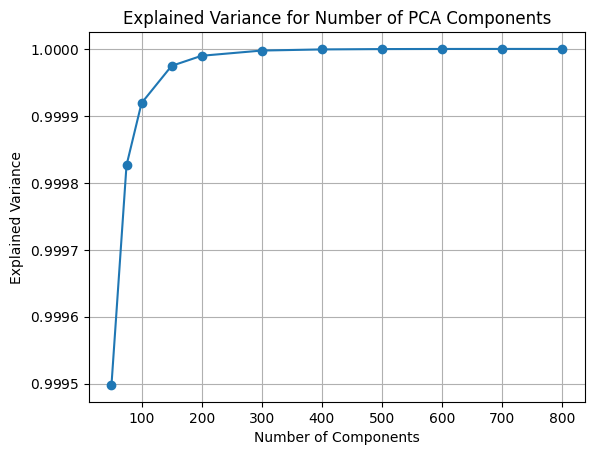

In [7]:
# Plot the explained variance as a function of the number of components
plt.plot(n_components, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance for Number of PCA Components')
plt.grid()

# Format the y-axis tick labels to display in long form
plt.gca().get_yaxis().set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='plain', useOffset=False)


plt.show()

In [ ]:
n_components_chosen = 300